# HW1

## Task 1.1 (0.5 points)

Show that cosine distance between two vectors is always between $0$ and $2$. 

### YOUR SOLUTION HERE



## Task 1.2 (1 point)

Let $\boldsymbol A \in\mathbb R^{m\times n}$, $\boldsymbol B \in\mathbb R^{n\times m}$. Prove that $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$. Using this property, calculate $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T})$ if $\boldsymbol u, \boldsymbol v \in\mathbb R^n$, $\boldsymbol u \perp \boldsymbol v$.

### YOUR SOLUTION HERE

## Task 1.3 (0.5 points)

A **permutation matrix** $\boldsymbol P$ is obtained from the identity matrix $\boldsymbol I$ by some permutation of rows (or columns). Show that $\boldsymbol P^{-1} = \boldsymbol P^\mathsf{T}$.

### YOUR SOLUTION HERE

## Task 1.4 (1 point)

Let $\boldsymbol A \in \mathbb R^{m\times n}$. Prove that $N(\boldsymbol A) = N(\boldsymbol A^{\mathsf T}\boldsymbol A)$.

### YOUR SOLUTION HERE

## Task 1.5 (programming, 2 points)

Compare the performance of matrix multiplication 

$$
       \boldsymbol C = \boldsymbol {AB}, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol B \in \mathbb R^{n\times p}.
$$

Try the following methods:

* nested pythonic loop implementing the formula $C_{ik} = \sum\limits_{j=1}^n A_{ij}B_{jk}$
* replace the inner `for` loop by `np.dot` for calculating $\boldsymbol a_i^\top \boldsymbol b_k$
* calculate $\sum\limits_{j=1}^n \boldsymbol a_j \boldsymbol b_j^\top$ (use [np.outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html))
* just use numpy and calculate `A @ B`

The plan (see aslo dot product demo below):

* implement these four functions
* test that they return the same result
* measure their performance on a square matrix of shape $100\times 100$
* plot graphs of the execution time versus $n$

In [32]:
import numpy as np

def mat_mul_loop(A, B: np.array) -> np.array:
    # YOUR CODE HERE
    pass 

def mat_mul_inner(A, B: np.array) -> np.array:
    # YOUR CODE HERE
    pass 

def mat_mul_outer(A, B: np.array) -> np.array:
    # YOUR CODE HERE
    pass 

def mat_mul_np(A, B: np.array) -> np.array:
    # YOUR CODE HERE
    pass 

In [33]:
# TESTING AREA
for n in range(1, 101):
    m = np.random.randint(1, 101)
    p = np.random.randint(1, 101)
    A = np.random.randn(m, n)
    B = np.random.randn(n, p)
    prod_loop = mat_mul_loop(A, B)
    prod_inner = mat_mul_inner(A, B)
    prod_outer = mat_mul_outer(A, B)
    prod_np = mat_mul_np(A, B)
    assert np.allclose(prod_loop, prod_inner)
    assert np.allclose(prod_loop, prod_np)
    assert np.allclose(prod_loop, prod_outer)

Measure performance on two square matrices:

In [34]:
n = 100
A = np.random.randn(n, n)
B = np.random.randn(n, n)

In [51]:
# timeit!
# YOUR CODE HERE

Plot the graphs:

In [47]:
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

def measure_time(func, m, n, p, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(m, n), np.random.randn(n, p))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=10, max_size=200, n_samples=20):
    times = []
    sizes = np.arange(step, max_size + 1, step)
    for size in sizes:
        times.append(measure_time(func, size, size, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=10, max_size=100, n_samples=20):
    loop_times = 1000*get_times_lists(mat_mul_loop, step, max_size, n_samples)
    inner_times = 1000*get_times_lists(mat_mul_inner, step, max_size, n_samples)
    outer_times = 1000*get_times_lists(mat_mul_outer, step, max_size, n_samples)
    np_times = 1000*get_times_lists(mat_mul_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.semilogy(sizes, loop_times, c='r', lw=2, label="loop")
    plt.semilogy(sizes, inner_times, c='b', lw=2, label="inner")
    plt.semilogy(sizes, outer_times, c='g', lw=2, label="outer")
    plt.semilogy(sizes, np_times, c='m', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Matrix product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":");

In [52]:
# YOUR CODE HERE

YOUR CONCLUSIONS HERE

## Demo for task 1.5: dot product performance

Compare several implementations of the dot product.

In [1]:
import numpy as np

def dot_loop(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

def dot_sum(a, b):
    return sum(a * b)

def dot_np(a, b):
    return a @ b

Test that all this functions produce the same result:

In [2]:
for n in range(1, 101):
    a = np.random.randn(n)
    b = np.random.randn(n)
    assert np.allclose(dot_loop(a, b), dot_sum(a, b))
    assert np.allclose(dot_loop(a, b), dot_np(a, b))
    assert np.allclose(dot_np(a, b), dot_sum(a, b))

Measure performance:

In [3]:
n = 1000
a = np.random.randn(n)
b = np.random.randn(n)

In [9]:
%%timeit
dot_loop(a, b)

450 µs ± 71.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%%timeit
dot_sum(a, b)

111 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
%%timeit
dot_np(a, b)

2.33 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


This is why you should almost always prefer `numpy` to pythonic loops! To emphasize this effect, plot the graphs of execution time versus array size.

In [22]:
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

def measure_time(func, size, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(size), np.random.randn(size))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=20, max_size=1000, n_samples=20):
    times = []
    sizes = np.arange(20, max_size + 1, 20)
    for size in sizes:
        times.append(measure_time(func, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=20, max_size=1000, n_samples=50):
    loop_times = 1000*get_times_lists(dot_loop, step, max_size, n_samples)
    sum_times = 1000*get_times_lists(dot_sum, step, max_size, n_samples)
    np_times = 1000*get_times_lists(dot_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.plot(sizes, loop_times, c='r', lw=2, label="loop")
    plt.plot(sizes, sum_times, c='b', lw=2, label="sum")
    plt.plot(sizes, np_times, c='g', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Dot product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":");

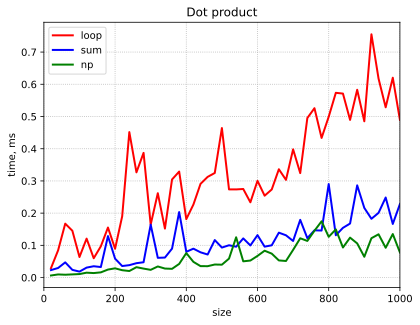

In [23]:
plot_time_vs_size()